In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from scipy.optimize import newton
import scipy.constants as sc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pypvcell.solarcell import SQCell, MJCell,ResistorCell,SolarCell,SeriesConnect,ParallelConnect,DiodeSeriesConnect
from pypvcell.illumination import load_astm

In [3]:
r1cell=ResistorCell(1.0)
r2cell=ResistorCell(2.0)

## Series Connect

In [4]:
sc_comp=SeriesConnect([r1cell, r2cell])

3.0

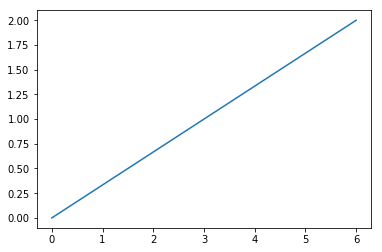

In [5]:
test_c=np.linspace(0,2,10)
test_v=sc_comp.get_v_from_j(test_c)
plt.plot(test_v,test_c)
test_v[5]/test_c[5]

In [6]:
test_v=3
test_c=sc_comp.get_single_j_from_v(test_v)
test_c

1.0

3.0

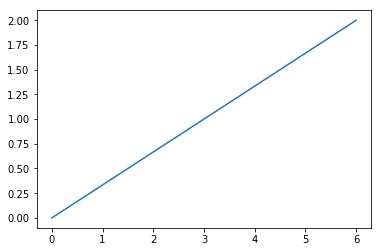

In [7]:
test_v=np.linspace(0,6,10)
test_c=sc_comp.get_j_from_v(test_v)
plt.plot(test_v,test_c)
test_v[5]/test_c[5]

In [8]:
r1cell.get_j_from_v_by_newton(2.5)

2.5

## Parallel connect

In [9]:
pp_comp=ParallelConnect([r1cell, r2cell])

0.66666666666666674

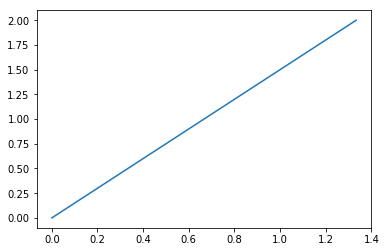

In [10]:
test_c=np.linspace(0,2,10)
test_v=pp_comp.get_v_from_j(test_c)
plt.plot(test_v,test_c)
test_v[5]/test_c[5]

## Test diodes (no jsc)

In [11]:
d1=SQCell(1.42,300)
d2=SQCell(1.42,300)

In [12]:
sd=SeriesConnect([d1,d2])

In [13]:
sd.get_single_j_from_v(1.6,0.002)

0.0043567557037776025

In [14]:
d1.get_j_from_v(0.8)

0.0043567557037777595

## Test diodes (with jsc)

In [15]:
from pypvcell.illumination import load_astm

In [77]:
d1=SQCell(1.42,300)
d2=SQCell(1.42,300)
d1.set_input_spectrum(1.0*load_astm())
d2.set_input_spectrum(1.1*load_astm())

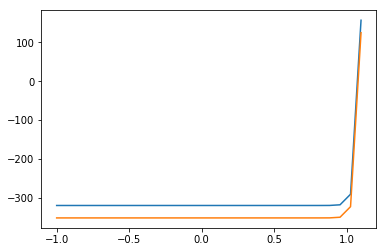

In [78]:
test_v=np.linspace(-1,1.1,30)
plt.plot(test_v,d1.get_j_from_v(test_v))
plt.plot(test_v,d2.get_j_from_v(test_v))

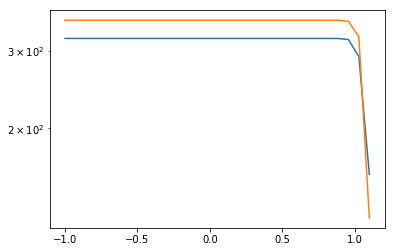

In [79]:
test_v=np.linspace(-1,1.1,30)
plt.semilogy(test_v,np.abs(d1.get_j_from_v(test_v)))
plt.semilogy(test_v,np.abs(d2.get_j_from_v(test_v)))

In [80]:
d1.get_j_from_v(test_v)

array([-320.42957639, -320.42957639, -320.42957639, -320.42957639,
       -320.42957639, -320.42957639, -320.42957639, -320.42957639,
       -320.42957639, -320.42957639, -320.42957639, -320.42957639,
       -320.42957639, -320.42957639, -320.42957639, -320.42957639,
       -320.42957639, -320.42957639, -320.42957639, -320.42957639,
       -320.42957639, -320.4295763 , -320.42957493, -320.42955241,
       -320.42918152, -320.42307586, -320.32256073, -318.66781977,
       -291.42647046,  157.0371417 ])

In [81]:
sd=DiodeSeriesConnect([d1,d2])

In [85]:
d3=SQCell(1.42,cell_T=300)

In [91]:
d3.set_input_spectrum(load_astm())
print(test_v)
d3.get_j_from_v(test_v)

[-1.         -0.92758621 -0.85517241 -0.78275862 -0.71034483 -0.63793103
 -0.56551724 -0.49310345 -0.42068966 -0.34827586 -0.27586207 -0.20344828
 -0.13103448 -0.05862069  0.0137931   0.0862069   0.15862069  0.23103448
  0.30344828  0.37586207  0.44827586  0.52068966  0.59310345  0.66551724
  0.73793103  0.81034483  0.88275862  0.95517241  1.02758621  1.1       ]


array([-320.42957639, -320.42957639, -320.42957639, -320.42957639,
       -320.42957639, -320.42957639, -320.42957639, -320.42957639,
       -320.42957639, -320.42957639, -320.42957639, -320.42957639,
       -320.42957639, -320.42957639, -320.42957639, -320.42957639,
       -320.42957639, -320.42957639, -320.42957639, -320.42957639,
       -320.42957639, -320.4295763 , -320.42957493, -320.42955241,
       -320.42918152, -320.42307586, -320.32256073, -318.66781977,
       -291.42647046,  157.0371417 ])

In [92]:
d3.jsc

320.42957639087012

In [43]:
sd.get_single_j_from_v(3.0,10)

2504087908.8450556

In [44]:
d1.get_j_from_v(1.5)

2504087940.8880234

In [45]:
sd.get_single_j_from_v(1.0,-310)

V(x)=1.0
f(a)=0.04808222594503708
f(b)=1.1970900347590714


ValueError: f(a) and f(b) must have different signs

In [46]:
lower_bound_j=d1.get_j_from_v(-10)
print(lower_bound_j)
sd.get_single_j_from_v_bisect(1.0,lower_bound_j,0)

-320.429576391
V(x)=1.0
f(a)=0.04808222594503708
f(b)=1.1840921760296577


ValueError: f(a) and f(b) must have different signs

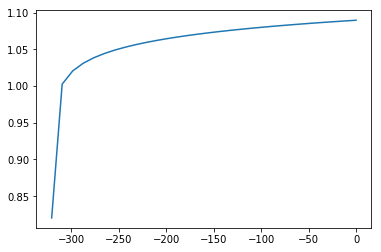

In [47]:
test_v=np.linspace(-320.42,0,30)
plt.plot(test_v,d1.get_v_from_j(test_v))

In [48]:
test_v=np.linspace(0,2.5,30)
plt.plot(test_v,sd.get_j_from_v(test_v))

V(x)=0.0
f(a)=1.048082225945037
f(b)=2.1970900347590714


ValueError: f(a) and f(b) must have different signs

In [65]:
d1.get_j_from_v(-50)

0.0

In [49]:
sd.get_single_j_from_v(2.0)

V(x)=2.0
f(a)=-0.9519177740549629
f(b)=0.1970900347590714


-318.91215221965905

In [50]:
d1.j01

1.5839816735436874e-16

In [51]:
m=1/(sc.k*300/sc.e)
print(m)

38.681740201336694


In [52]:
jj=-319.8
def eq1(volt):
    return -320+d1.j01*np.exp(m*volt)-jj

def eq1_p(volt):
    return d1.j01*m*np.exp(m*volt)


def eq_set(volt):
    
    out=[]
    out.append(eq1(volt[0]))
    out.append(eq1(volt[1]))
    
    return out

def eq_set_p(volt):
    
    out=[]
    out.append(d1.j01*m*np.exp(m*volt))
    out.append(d1.j01*m*np.exp(m*volt))
    return out
    


def test_eqset(x):
    
    out=[]
    out.append(2*x[0]+x[1]-3)
    out.append(x[0]*1-3*x[1]-2)
    
    return out

from scipy.optimize import fsolve

In [53]:
fsolve(eq_set,x0=[0.8,0.8],fprime=eq_set_p)

array([ 0.8,  0.8])

In [54]:
fsolve(eq1_p,x0=1.2,fprime=eq1_p)

/Users/kanhua/miniconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The number of calls to function has reached maxfev = 200.
  warnings.warn(msg, RuntimeWarning)


array([-3.32360689])

In [55]:
newton(eq1,x0=1.2,fprime=eq1_p)

0.89892496229206142

In [56]:
fsolve(test_eqset,x0=[0.8,0.8])

array([ 1.57142857, -0.14285714])

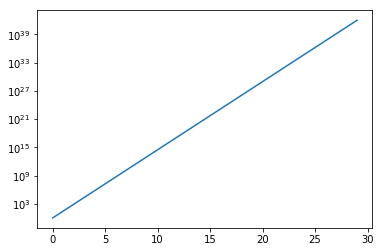

In [57]:
plt.semilogy(np.exp(m*test_v))

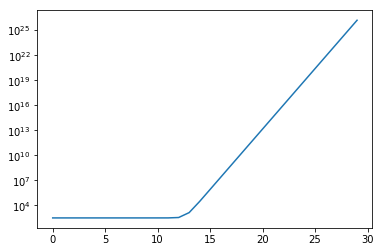

In [58]:
plt.semilogy(d1.j01*np.exp(m*test_v)+d1.jsc)

In [59]:
d1.j01/1.0*(np.exp(m*test_v)-1)

array([  0.00000000e+00,   4.28753332e-15,   1.24630336e-13,
         3.50242104e-12,   9.83105007e-11,   2.75939070e-09,
         7.74507869e-08,   2.17389443e-06,   6.10170298e-05,
         1.71263051e-03,   4.80702400e-02,   1.34923906e+00,
         3.78705418e+01,   1.06295317e+03,   2.98350483e+04,
         8.37412346e+05,   2.35045517e+07,   6.59727499e+08,
         1.85172803e+10,   5.19744395e+11,   1.45882242e+13,
         4.09463356e+14,   1.14928478e+16,   3.22582103e+17,
         9.05425837e+18,   2.54135595e+20,   7.13309669e+21,
         2.00212286e+23,   5.61957327e+24,   1.57730599e+26])

In [60]:
from pypvcell.ivsolver import gen_rec_iv_by_rad_eta

In [61]:
gen_rec_iv_by_rad_eta(d1.j01,rad_eta=1.0,n1=1.0,temperature=300,rshunt=np.inf,voltage=test_v)

(array([ 0.        ,  0.0862069 ,  0.17241379,  0.25862069,  0.34482759,
         0.43103448,  0.51724138,  0.60344828,  0.68965517,  0.77586207,
         0.86206897,  0.94827586,  1.03448276,  1.12068966,  1.20689655,
         1.29310345,  1.37931034,  1.46551724,  1.55172414,  1.63793103,
         1.72413793,  1.81034483,  1.89655172,  1.98275862,  2.06896552,
         2.15517241,  2.24137931,  2.32758621,  2.4137931 ,  2.5       ]),
 array([  1.58398167e-16,   4.44593149e-15,   1.24788734e-13,
          3.50257944e-12,   9.83106591e-11,   2.75939086e-09,
          7.74507870e-08,   2.17389443e-06,   6.10170298e-05,
          1.71263051e-03,   4.80702400e-02,   1.34923906e+00,
          3.78705418e+01,   1.06295317e+03,   2.98350483e+04,
          8.37412346e+05,   2.35045517e+07,   6.59727499e+08,
          1.85172803e+10,   5.19744395e+11,   1.45882242e+13,
          4.09463356e+14,   1.14928478e+16,   3.22582103e+17,
          9.05425837e+18,   2.54135595e+20,   7.13309669e+21,
  

In [66]:
gen_rec_iv_by_rad_eta(d1.j01,rad_eta=1.0,n1=1.0,temperature=300,rshunt=np.inf,voltage=-50)

(-50, 0.0)

In [74]:
d1.j01/1.0*(np.exp(m*(-0.1))

SyntaxError: unexpected EOF while parsing (<ipython-input-74-c77d465603f0>, line 1)